## Telecom Churn Case Study

##### Problem Statement
> In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

> For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to **predict which customers are at high risk of churn.** In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

> In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

In [1]:
#import initial libraries

import pandas as pd
import numpy as np
import warnings
import re

#Analytics model
import seaborn  as sns
import matplotlib.pyplot as plt

#ML libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Configs
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
# float value display to 2 decimal
pd.options.display.float_format = '{:20,.2f}'.format 


warnings.filterwarnings('ignore')

# 1. Read dataset

In [13]:
#read csv to pd dataframe
telecom_df = pd.read_csv("datasets/train.csv")
telecom_test_df = pd.read_csv("datasets/test.csv")

In [14]:
telecom_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,31.28,87.01,7.53,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.00,0.00,0.00,0.00,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,65.09,204.99,1.01,0.00,0.00,0.00,8.20,0.63,0.00,0.38,0.00,0.00,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.00,0.00,0.00,0.00,0.00,0.00,7.46,27.58,15.18,11.84,53.04,40.56,0.00,0.00,0.66,0.00,0.00,0.00,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.00,0.00,0.00,0
1,1,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,0.00,122.79,42.95,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,30.73,31.66,0.00,0.00,0.00,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.44,39.44,25.04,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,

In [15]:
telecom_df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,"69,999.00","69,999.00","69,297.00","69,297.00","69,297.00","69,999.00","69,999.00","69,999.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","69,999.00","69,999.00","69,999.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","69,999.00","69,999.00","69,999.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","69,999.00","69,999.00","69,999.00","69,999.00","69,999.00","69,999.00","69,999.00","69,999.00","69,999.00","69,999.00","69,999.00","69,999.00","17,568.00","17,865.00","18,417.00","17,568.00","17,865.00","18,417.00","17,568.00","17,865.00","18,417.00","17,568.00","17,865.00","18,417.00","17,568.00","17,865.00","18,417.00","69,999.00","69,999.00","69,999.00","69,999.00","69,999.00","69,999.00","17,568.00","17,865.00","18,417

# 2. Handling missing data

In [6]:
# null percentage 
columns = 100 * telecom_df.isnull().sum()/ len(telecom_df)
columns

id                                         0.00
circle_id                                  0.00
loc_og_t2o_mou                             1.00
std_og_t2o_mou                             1.00
loc_ic_t2o_mou                             1.00
last_date_of_month_6                       0.00
last_date_of_month_7                       0.57
last_date_of_month_8                       1.05
arpu_6                                     0.00
arpu_7                                     0.00
arpu_8                                     0.00
onnet_mou_6                                3.95
onnet_mou_7                                3.84
onnet_mou_8                                5.29
offnet_mou_6                               3.95
offnet_mou_7                               3.84
offnet_mou_8                               5.29
roam_ic_mou_6                              3.95
roam_ic_mou_7                              3.84
roam_ic_mou_8                              5.29
roam_og_mou_6                           

In [7]:
# drop columsn where null value is greater than 60%
telecom_df.dropna(thresh=int(0.4 * len(telecom_df)), axis=1, inplace=True)

In [16]:
telecom_df.describe(include='all')

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,"69,999.00","69,999.00","69,297.00","69,297.00","69,297.00",69999,69600,69266,"69,999.00","69,999.00","69,999.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","69,999.00","69,999.00","69,999.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","69,999.00","69,999.00","69,999.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","67,231.00","67,312.00","66,296.00","69,999.00","69,999.00","69,999.00","69,999.00","69,999.00","69,999.00","69,999.00","69,999.00","69,999.00",68898,68765,67538,"69,999.00","69,999.00","69,999.00",17568,17865,18417,"17,568.00","17,865.00","18,417

In [17]:
#restrict dataset on targeted columns
columns = list(telecom_df.columns) #create columns list

total_amounts = [i for i in columns if re.search('total.+amt',i)]
total_outgoing_minutes = [i for i in columns if re.search('total.+og.+mou',i)]
offnetwork_minutes = [i for i in columns if re.search('offnet',i)]
average_revenue_3g = [i for i in columns if re.search('arpu.+3g',i)]
average_revenue_2g = [i for i in columns if re.search('arpu.+2g',i)]
volume_3g = [i for i in columns if re.search('vol.+3g',i)]
volume_2g = [i for i in columns if re.search('vol.+2g',i)]
age_on_network = [i for i in columns if re.search('aon',i)]

#Storing them in a single flat list
variables = ['id', 
             *total_amounts, 
             *total_outgoing_minutes, 
             *offnetwork_minutes, 
             *average_revenue_3g, 
             *average_revenue_2g,
             *volume_3g,
             *volume_2g,
             *age_on_network, 
             'churn_probability']

telecom_df = telecom_df[variables].set_index('id')

In [18]:
telecom_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_rech_amt_6   69999 non-null  int64  
 1   total_rech_amt_7   69999 non-null  int64  
 2   total_rech_amt_8   69999 non-null  int64  
 3   total_og_mou_6     69999 non-null  float64
 4   total_og_mou_7     69999 non-null  float64
 5   total_og_mou_8     69999 non-null  float64
 6   offnet_mou_6       67231 non-null  float64
 7   offnet_mou_7       67312 non-null  float64
 8   offnet_mou_8       66296 non-null  float64
 9   arpu_3g_6          17568 non-null  float64
 10  arpu_3g_7          17865 non-null  float64
 11  arpu_3g_8          18417 non-null  float64
 12  arpu_2g_6          17568 non-null  float64
 13  arpu_2g_7          17865 non-null  float64
 14  arpu_2g_8          18417 non-null  float64
 15  vol_3g_mb_6        69999 non-null  float64
 16  vol_3g_mb_7        699

In [19]:
missing_data_percent = 100*telecom_df.isnull().sum()/len(telecom_df)
missing_data_percent

total_rech_amt_6                    0.00
total_rech_amt_7                    0.00
total_rech_amt_8                    0.00
total_og_mou_6                      0.00
total_og_mou_7                      0.00
total_og_mou_8                      0.00
offnet_mou_6                        3.95
offnet_mou_7                        3.84
offnet_mou_8                        5.29
arpu_3g_6                          74.90
arpu_3g_7                          74.48
arpu_3g_8                          73.69
arpu_2g_6                          74.90
arpu_2g_7                          74.48
arpu_2g_8                          73.69
vol_3g_mb_6                         0.00
vol_3g_mb_7                         0.00
vol_3g_mb_8                         0.00
vol_2g_mb_6                         0.00
vol_2g_mb_7                         0.00
vol_2g_mb_8                         0.00
aon                                 0.00
churn_probability                   0.00
dtype: float64

In [20]:
#missing percentage of columns

impute_cols = missing_data_percent[missing_data_percent.le(40)].index
impute_cols

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'aon',
       'churn_probability'],
      dtype='object')

In [26]:
missing_data_percent = 100*telecom_df[impute_cols].isnull().sum()/len(telecom_df[impute_cols])
missing_data_percent

total_rech_amt_6                    0.00
total_rech_amt_7                    0.00
total_rech_amt_8                    0.00
total_og_mou_6                      0.00
total_og_mou_7                      0.00
total_og_mou_8                      0.00
offnet_mou_6                        0.00
offnet_mou_7                        0.00
offnet_mou_8                        0.00
vol_3g_mb_6                         0.00
vol_3g_mb_7                         0.00
vol_3g_mb_8                         0.00
vol_2g_mb_6                         0.00
vol_2g_mb_7                         0.00
vol_2g_mb_8                         0.00
aon                                 0.00
churn_probability                   0.00
dtype: float64

In [33]:
imp = SimpleImputer(strategy='constant', fill_value=0)
telecom_df[impute_cols] = imp.fit_transform(telecom_df[impute_cols])

# 3. EDA and Preprocessing ###

In [36]:
# Split the target and feature set
X = telecom_df[impute_cols].drop('churn_probability', axis=1)  # drop churn probability as that is target variable
y = telecom_df['churn_probability']

- We have required columns and X_train and y_train dataset. lets start with logistic regression without PCA
- Target is to build a model without using PCA with multivariate logistic regression

In [39]:
#Split train and test data to understand model accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48999, 16), (21000, 16), (48999,), (21000,))

<Axes: >

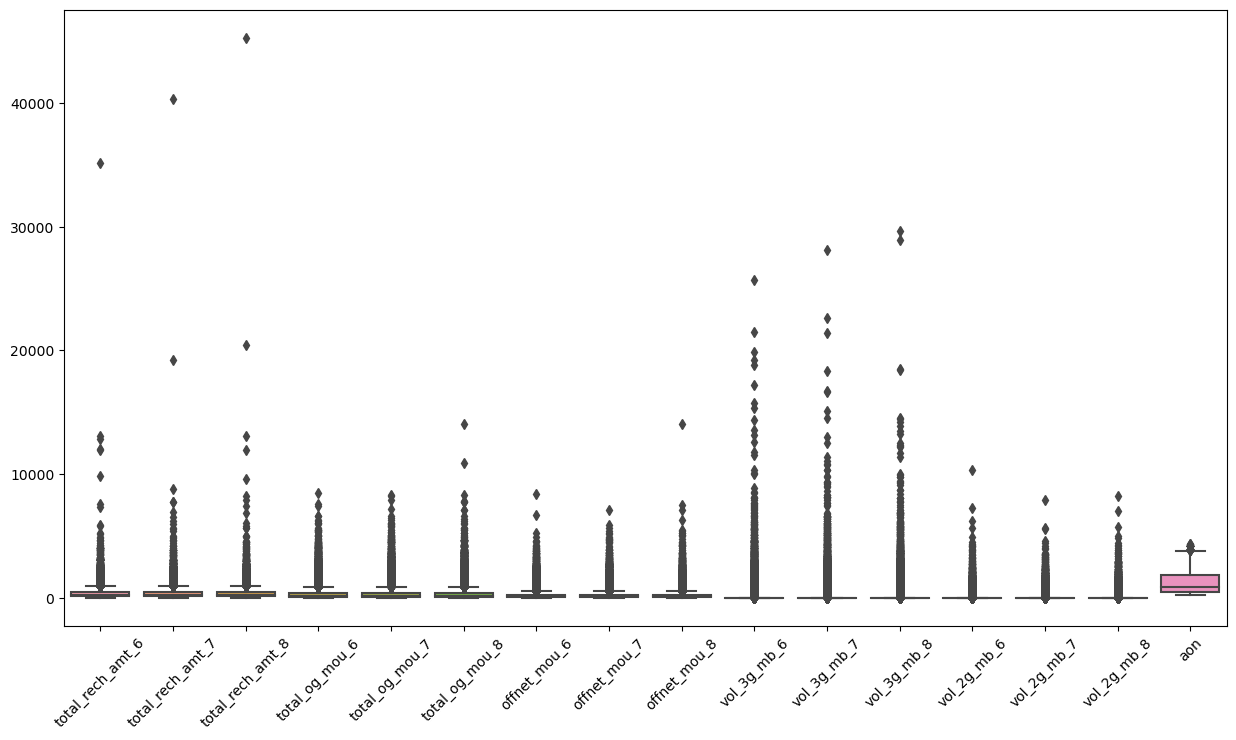

In [40]:
#outliers on train data
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X_train)

#### 3.1 Handling Outliers ####

In [41]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

<Axes: >

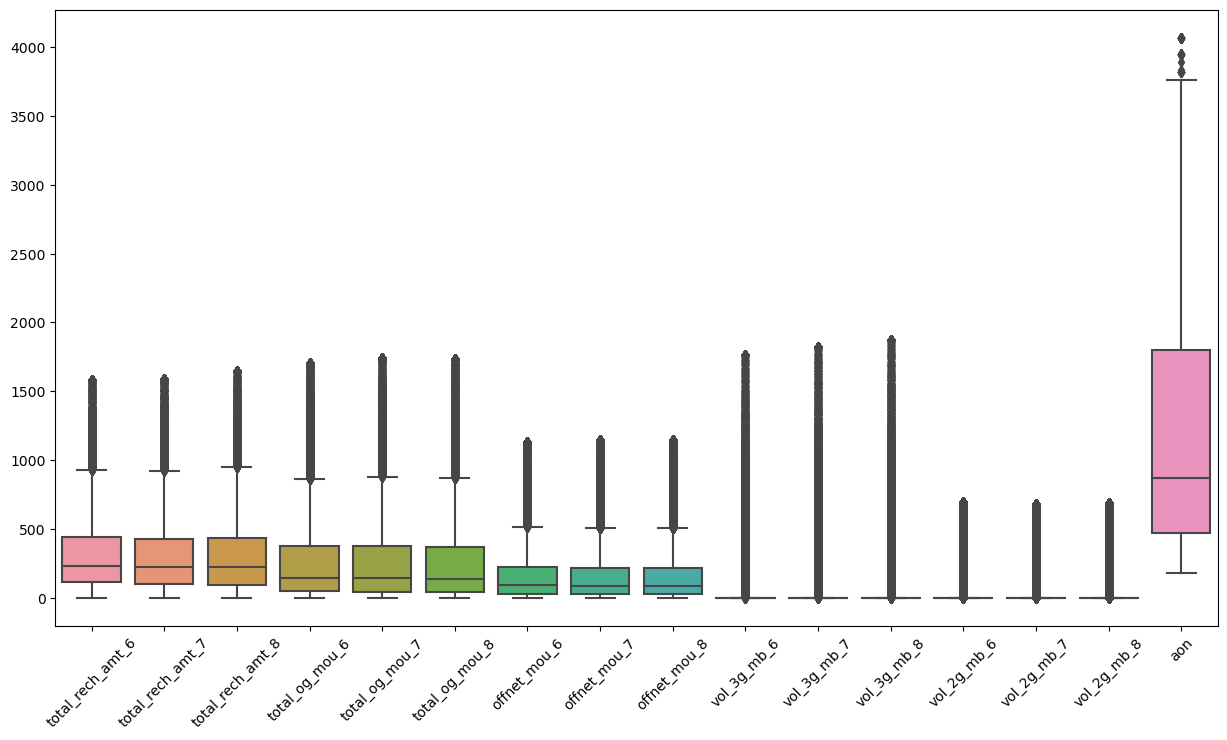

In [42]:
X_train_1 = X_train.apply(cap_outliers, axis=0)

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X_train_1)

##### 3.2 Feature Scaling 

In [43]:
scale = StandardScaler()
X_train_filtered_1 = scale.fit_transform(X_train_1)

<Axes: >

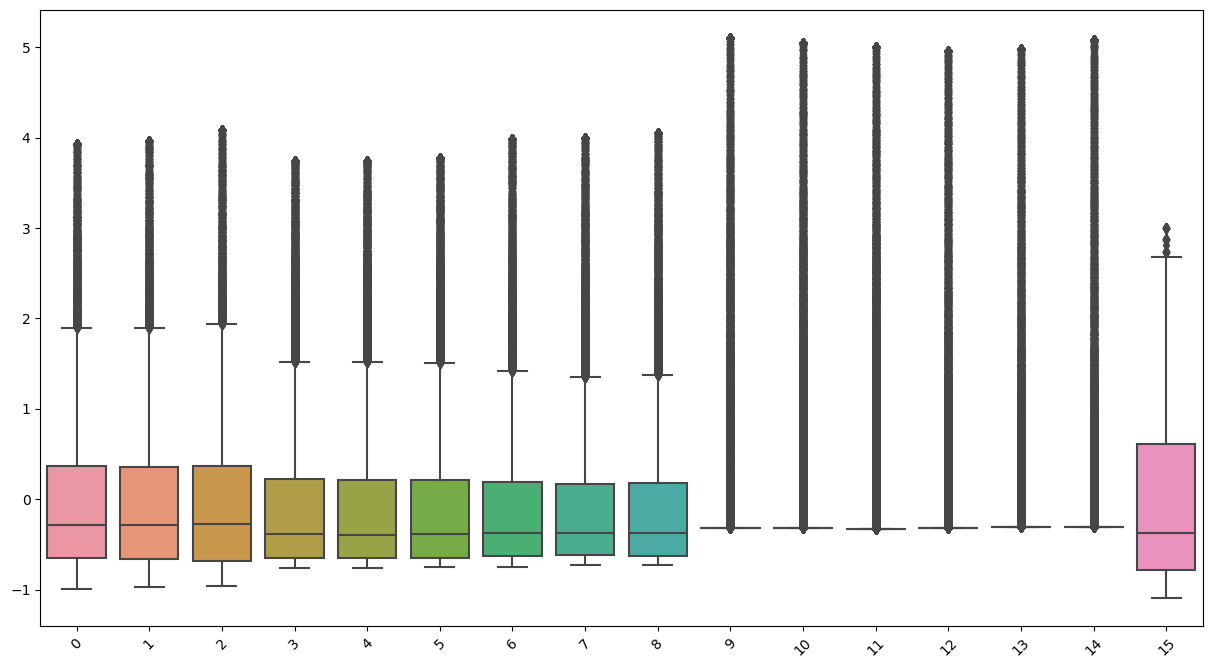

In [44]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = pd.DataFrame(X_train_filtered_1))

# 4. Feature engineering and selection

Let's understand feature importances for raw features as well as components to decide top features for modelling.

In [45]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [46]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [47]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")


In [48]:
%%time
grid_search.fit(X_train_filtered_1, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
CPU times: user 12.5 s, sys: 1.65 s, total: 14.1 s
Wall time: 4min 44s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [49]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [50]:
feature_importances = pd.DataFrame({'col':X_train_1.columns, 'importance':rf_best.feature_importances_})

<BarContainer object of 16 artists>

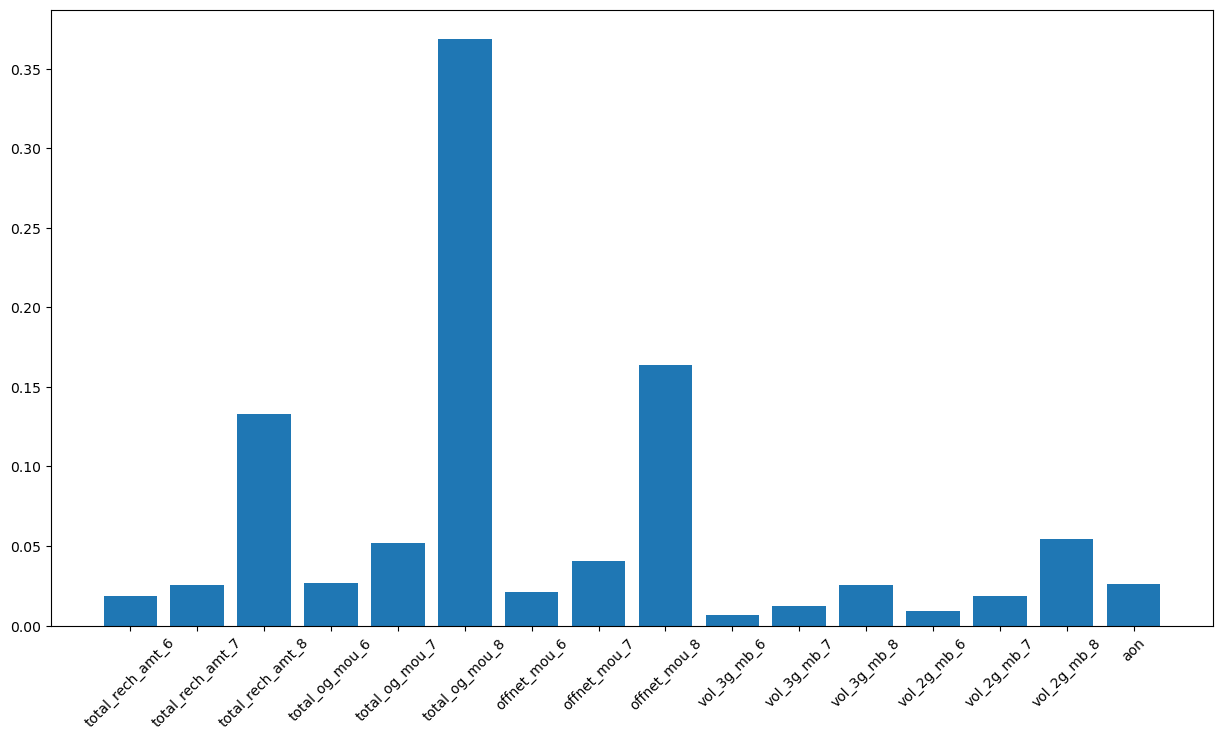

In [51]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
plt.bar(feature_importances['col'], feature_importances['importance'])

## 5. Model building

### 5.1 Model 1 (Logistic regression without PCA)

In [52]:
# Logistic Regression Model
pipeline_logistic = Pipeline([
    ('scaler', StandardScaler()),           # Step 1: Standard scaling
    ('classifier', LogisticRegression(max_iter=1000))  # Step 2: Logistic regression
])

pipeline_logistic.fit(X_train_1, y_train)

# Predictions
y_pred_log = pipeline_logistic.predict(X_test)
y_train_pred_log = pipeline_logistic.predict(X_train_1)

# Evaluation
print("Logistic Regression (Without PCA):")
print(classification_report(y_test, y_pred_log))
print("Test Accuracy:", accuracy_score(y_test, y_pred_log))
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_log))

Logistic Regression (Without PCA):
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     18894
         1.0       0.52      0.08      0.15      2106

    accuracy                           0.90     21000
   macro avg       0.71      0.54      0.55     21000
weighted avg       0.87      0.90      0.87     21000

Test Accuracy: 0.9004285714285715
Train Accuracy: 0.9012224739280393


### 5.2 Model 2 (Random forest without PCA)

In [53]:
# Random Forest Model
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),      
    ('classifier', RandomForestClassifier(random_state=50))
])

pipeline_rf.fit(X_train_1, y_train)

# Predictions on train set
y_pred_rf_train = pipeline_rf.predict(X_train_1)
y_pred_rf_test = pipeline_rf.predict(X_test)

# Evaluation on train set
print("Random Forest (Without PCA):")
print(classification_report(y_train, y_pred_rf_train))
print("Train Accuracy:", accuracy_score(y_train, y_pred_rf_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf_test))


Random Forest (Without PCA):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     43973
         1.0       1.00      1.00      1.00      5026

    accuracy                           1.00     48999
   macro avg       1.00      1.00      1.00     48999
weighted avg       1.00      1.00      1.00     48999

Train Accuracy: 0.9999795914202331
Test Accuracy: 0.9322857142857143


In [54]:
#train confusion matrix
confusion_matrix(y_train, pipeline_rf.predict(X_train_1))

array([[43973,     0],
       [    1,  5025]])

In [55]:
#test confusion matrix
confusion_matrix(y_test, pipeline_rf.predict(X_test))

array([[18390,   504],
       [  918,  1188]])

#### 5.3 Applying PCA for Dimensionality Reduction ####

Explained variance per principal component: [0.4066686  0.28264426 0.13056515 0.04961896 0.02352172 0.02170919
 0.01924853 0.01727644 0.01372275 0.01258853 0.0065701  0.00584253
 0.00333704 0.00295607 0.0022391  0.00149103]


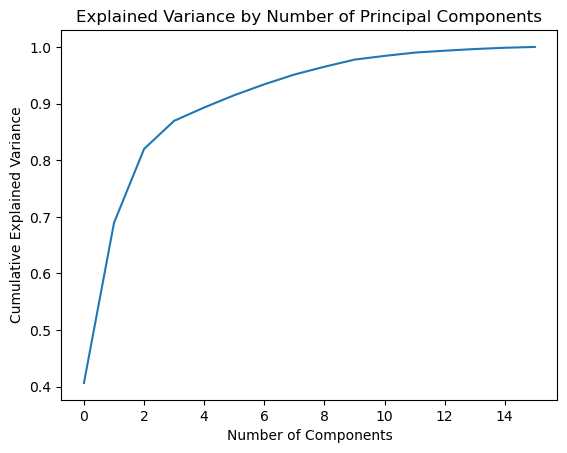

In [56]:
# PCA to reduce dimensionality
pca = PCA()  # Adjust components as needed
X_train_pca = pca.fit_transform(X_train_1)
X_test_pca = pca.transform(X_test)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance per principal component:", explained_variance)

# Plot cumulative explained variance
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.show()

### 5.4 Model 3: Logistic regression with PCA

In [57]:
# Logistic Regression with PCA
log_model_pca = LogisticRegression(max_iter=1000)
log_model_pca.fit(X_train_pca, y_train)

# Predictions on train set
y_pred_log_pca_train = log_model_pca.predict(X_train_pca)
# Predictions on the test set (unseen data)
y_pred_log_pca_test = log_model_pca.predict(X_test_pca)

# Evaluation on train set
print("Logistic Regression (With PCA):")
print(classification_report(y_train, y_pred_log_pca_train))
print("Train Accuracy:", accuracy_score(y_train, y_pred_log_pca_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_log_pca_test))


Logistic Regression (With PCA):
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     43973
         1.0       0.62      0.10      0.17      5026

    accuracy                           0.90     48999
   macro avg       0.76      0.55      0.56     48999
weighted avg       0.88      0.90      0.87     48999

Train Accuracy: 0.9012428825078063
Test Accuracy: 0.9004285714285715


### 5.5 Model 4: Random Forest (With gridsearch)

In [58]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [59]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [60]:
imputer = IterativeImputer(max_iter=10, random_state=0)

In [61]:
scale = StandardScaler()
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [62]:
pipe = Pipeline(steps = [('imputation',imputer),
                         ('scaling',scale),
                         ('model',grid_search)])

In [69]:
pipe.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


Pipeline(steps=[('imputation', IterativeImputer(random_state=0)),
                ('scaling', StandardScaler()),
                ('model',
                 GridSearchCV(cv=4,
                              estimator=RandomForestClassifier(n_jobs=-1,
                                                               random_state=42),
                              n_jobs=-1,
                              param_grid={'max_depth': [2, 3, 5, 10, 20],
                                          'min_samples_leaf': [5, 10, 20, 50,
                                                               100, 200],
                                          'n_estimators': [10, 25, 50, 100]},
                              scoring='accuracy', verbose=1))])

In [70]:
train_score = pipe.score(X_train, y_train)
print("Training accuracy:", train_score)

Training accuracy: 0.9408559358354253


In [71]:
test_score = pipe.score(X_test, y_test)
print("Test accuracy:", test_score)

Test accuracy: 0.933952380952381


In [72]:
confusion_matrix(y_train, pipe.predict(X_train))

array([[42974,   999],
       [ 1899,  3127]])

In [73]:
confusion_matrix(y_test, pipe.predict(X_test))

array([[18365,   529],
       [  858,  1248]])

## 5.6 Model 5 : XG Boosting

In [81]:
import xgboost as xgb

# Create an XGBoost classifier
# xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
xgb_model = xgb.XGBClassifier(n_jobs = -1, objective = 'binary:logistic')


# Fit the model
xgb_model.fit(X_train_pca, y_train)

# Evaluate the model on the training set
xgb_train_predictions = xgb_model.predict(X_train_pca)
xgb_test_predictions = xgb_model.predict(X_test_pca)
print("XGBoost Train Accuracy:", accuracy_score(y_train, xgb_train_predictions))
print("XGBoost Test Accuracy:", accuracy_score(y_test, xgb_test_predictions))



XGBoost Train Accuracy: 0.9645094797853018
XGBoost Test Accuracy: 0.9096666666666666


## 6. Prepare solution from best RF model

In [77]:
new_columns = telecom_df.columns.drop(['churn_probability'])

In [78]:
submission_data = telecom_test_df.set_index('id')[new_columns]
submission_data.shape

(30000, 16)

In [79]:
telecom_test_df['churn_probability'] = pipeline_rf.predict(submission_data)
output = telecom_test_df[['id','churn_probability']]
output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [80]:
output.to_csv('submission_rf_pca_15_oct.csv',index=False)